In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#df = pd.read_excel('../Date_Fruit_Datasets.xlsx')
df = pd.read_csv('../heart.csv')
#df = pd.read_csv('../WineQT.csv')

In [18]:
df['HeartDisease'].unique()

array([0, 1], dtype=int64)

In [8]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
#Boxplot of numerical features
#countplot of the target
#correlation matrix of the features and the target

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import plotly.express as px

numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Perform Min-Max Scaling
standard_scaler = StandardScaler()
scaled_numerical_df_standard = standard_scaler.fit_transform(numerical_df)


scaled_numerical_df_standard = pd.DataFrame(scaled_numerical_df_standard, columns=numerical_df.columns)
# Create the horizontal box plot using Plotly Express
fig = px.box(scaled_numerical_df_standard, 
             orientation='h',
             title='Horizontal Box Plot of Multiple Numerical Columns',
             labels={'variable': 'Numerical Features', 'value': 'Value'})

# Show the plot

max_value_xaxis = 10  # Set the maximum value as per your requirement
fig.update_xaxes(range=[-max_value_xaxis, max_value_xaxis])
fig.update_layout(width=1000, height=1000)
fig.show()


In [21]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your pandas DataFrame

# Step 1: Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Step 2: Plot count plot for each categorical column
for column in categorical_columns:
    fig = px.bar(df[column].value_counts(), x=df[column].value_counts().index, y=df[column].value_counts().values)
    fig.update_layout(title_text=f"Count Plot of {column}", xaxis_title=column, yaxis_title="Count")
    fig.update_layout(width=800, height=600)
    #fig.update_yaxes(range=[50, 220])
    fig.show()


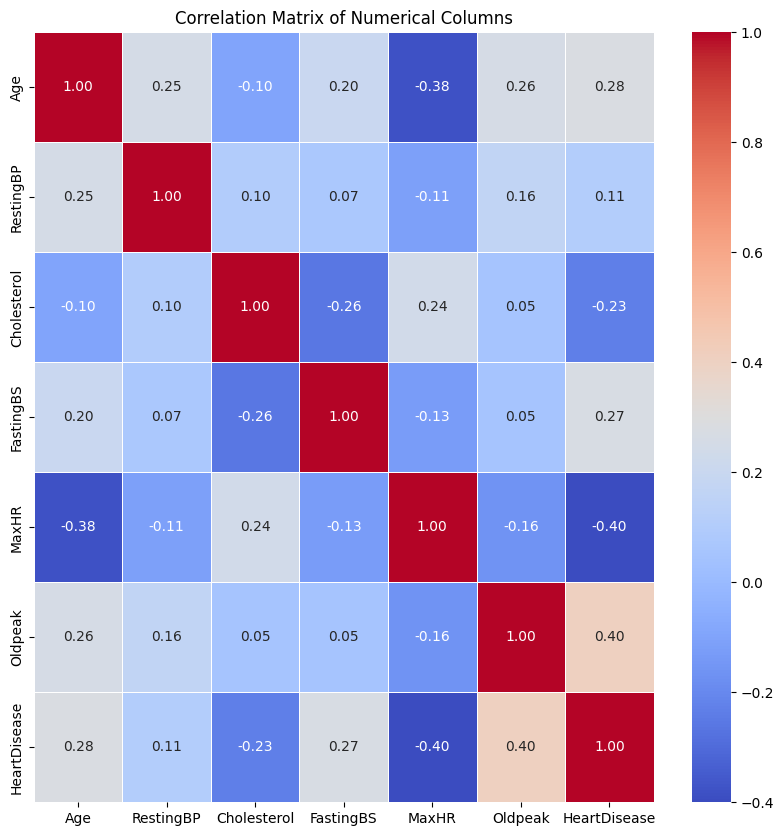

In [17]:
import seaborn as sns
numerical_columns = df.select_dtypes(include='number')
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')

plt.show()


In [22]:
column = 'HeartDisease'
fig = px.bar(df[column].value_counts(), x=df[column].value_counts().index, y=df[column].value_counts().values)
fig.update_layout(title_text=f"Count Plot of {column}", xaxis_title=column, yaxis_title="Count")
fig.update_layout(width=800, height=600)
#fig.update_yaxes(range=[50, 220])
fig.show()
